In [1]:
from transformers import pipeline
import pandas as pd


In [2]:
# Load the dataset
file_path = '/content/cleaned_text.csv'  # Replace with the correct path
df = pd.read_csv(file_path)

In [3]:
print(df.head())

                                cleaned_text
0  love well made sturdi comfort love pretti
1   love great upgrad origin mine coupl year
2     pillow save back love look feel pillow
3        miss inform use great product price
4        nice set good qualiti set two month


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features
X = vectorizer.fit_transform(df['cleaned_text']).toarray()

# Check the shape of the resulting matrix
print(f"TF-IDF matrix shape: {X.shape}")


TF-IDF matrix shape: (40431, 1000)


In [5]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X)

# Analyze the output
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Compute silhouette score
if n_clusters > 1:
    silhouette = silhouette_score(X, dbscan_labels, metric='cosine')
    print(f"Silhouette Score: {silhouette:.4f}")
else:
    print("Not enough clusters for Silhouette Score.")


Estimated number of clusters: 25
Number of noise points: 15507
Silhouette Score: -0.0741


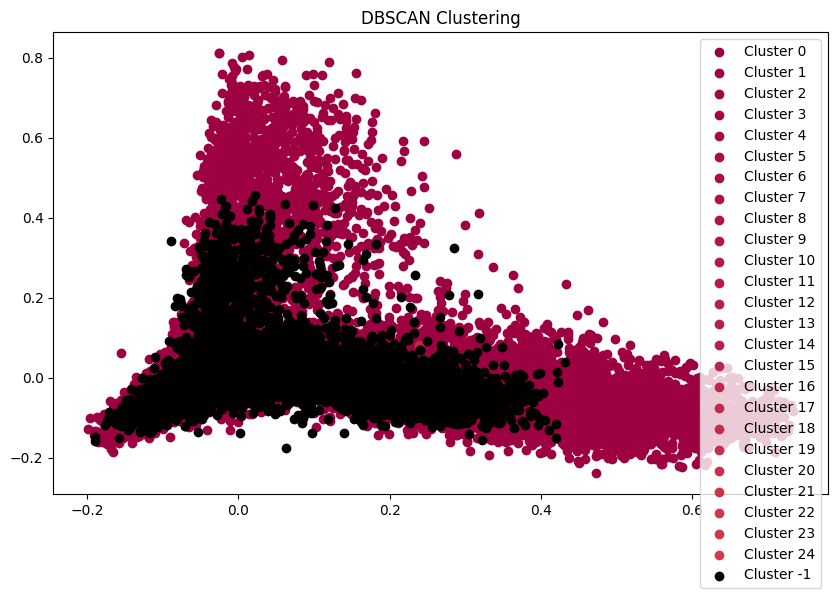

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters
plt.figure(figsize=(10, 6))
unique_labels = set(dbscan_labels)
colors = [plt.cm.Spectral(each) for each in unique_labels]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise points
        col = [0, 0, 0, 1]
    plt.scatter(X_pca[dbscan_labels == k, 0], X_pca[dbscan_labels == k, 1], c=[col], label=f'Cluster {k}')
plt.title("DBSCAN Clustering")
plt.legend()
plt.show()


# **Adjust eps and min_samples Parameters**

In [7]:
dbscan = DBSCAN(eps=0.3, min_samples=10, metric='cosine')  # Try smaller eps and higher min_samples
dbscan_labels = dbscan.fit_predict(X)


**Reduce Noise**

In [8]:
from sklearn.decomposition import PCA

# Reduce dimensions for DBSCAN
pca = PCA(n_components=50)  # Reduce to 50 dimensions
X_reduced = pca.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_reduced)


**Experiment with Metrics**

In [9]:
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)


**Cluster Evaluation Beyond Silhouette**

In [10]:
from collections import Counter
for cluster_id in set(dbscan_labels):
    if cluster_id == -1:
        continue  # Skip noise points
    cluster_points = [df['cleaned_text'][i] for i in range(len(dbscan_labels)) if dbscan_labels[i] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(Counter(" ".join(cluster_points).split()).most_common(10))  # Most common words


Cluster 0:
[('screw', 59), ('driver', 57), ('small', 31), ('come', 30), ('problem', 27), ('replac', 18), ('great', 10), ('tk3816i', 10), ('work', 9), ('easi', 8)]
Cluster 1:
[('class', 95), ('input', 85), ('type', 85), ('hidden', 85), ('name', 85), ('value', 85), ('http', 85), ('div', 68), ('imagesna', 54), ('sslimagesamazon', 52)]
Cluster 2:
[('de', 47), ('la', 31), ('vie', 16), ('liber', 16), ('f2', 15), ('3040mm', 13), ('mouton', 11), ('maqui', 10), ('su', 9), ('le', 8)]
Cluster 3:
[('use', 7), ('problem', 7), ('come', 7), ('small', 7), ('screw', 7), ('littl', 7), ('tight', 7), ('work', 2), ('laser', 2), ('need', 2)]
Cluster 4:
[('movi', 172), ('good', 50), ('love', 45), ('satir', 25), ('constitut', 20), ('v', 11), ('evil', 11), ('great', 8), ('long', 8), ('stori', 6)]
Cluster 5:
[('movi', 9), ('one', 9), ('favorit', 9), ('last', 4), ('year', 2), ('watch', 2), ('love', 1), ('anderson', 1), ('yearsi', 1)]
Cluster 6:
[('top', 93), ('notch', 92), ('stori', 67), ('act', 19), ('direct', 

In [11]:
import numpy as np
unique, counts = np.unique(dbscan_labels, return_counts=True)
cluster_summary = dict(zip(unique, counts))
print("Cluster Summary:", cluster_summary)


Cluster Summary: {-1: 40087, 0: 25, 1: 34, 2: 21, 3: 7, 4: 18, 5: 5, 6: 6, 7: 27, 8: 8, 9: 5, 10: 5, 11: 8, 12: 5, 13: 6, 14: 7, 15: 29, 16: 17, 17: 5, 18: 8, 19: 6, 20: 5, 21: 5, 22: 6, 23: 10, 24: 7, 25: 6, 26: 6, 27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 5, 33: 17}


In [12]:
for cluster_id in set(dbscan_labels):
    if cluster_id == -1:
        print("\nCluster -1 (Noise):")
    else:
        print(f"\nCluster {cluster_id}:")

    # Extract points in the cluster
    cluster_points = [df['cleaned_text'].iloc[i] for i in range(len(dbscan_labels)) if dbscan_labels[i] == cluster_id]

    # Print a few examples from the cluster
    print("Examples:")
    print(cluster_points[:5])  # Display the first 5 points in the cluster
    print(f"Total Points: {len(cluster_points)}")



Cluster 0:
Examples:
['great corner rack problem come small screw driver', 'want work great problem come small screw driver', 'great hideaway weapon problem come small screw driver', 'easi put problem come small screw driver replac screw driver', 'well made easi use problem come small screw driver replac screw driver']
Total Points: 25

Cluster 1:
Examples:
['div id videoblockr2t9a7cakjrexv class asect aspacingsmal aspacingtopmini videoblock div input type hidden name value http imagesna sslimagesamazon comimagesib9o4ps7u6i mp4 class videourl input type hidden name value http imagesna sslimagesamazon', 'div id videoblockr1ix1i14us2dt0 class asect aspacingsmal aspacingtopmini videoblock div input type hidden name value http imagesnasslimagesamazoncomimagesib9o4ps7u6imp4 class videourl input type hidden name value http imagesnasslimagesamazoncomimagesif3spng class videoslateimgurl nbsp input type hidden name value http imagesnasslimagesamazoncomimagesi81jx2w2f1wpng class videoslateimgur

In [13]:
from collections import Counter

for cluster_id in set(dbscan_labels):
    if cluster_id == -1:
        print("\nCluster -1 (Noise):")
    else:
        print(f"\nCluster {cluster_id}:")

    # Extract points in the cluster
    cluster_points = [df['cleaned_text'].iloc[i] for i in range(len(dbscan_labels)) if dbscan_labels[i] == cluster_id]

    # Combine all texts in the cluster
    combined_text = " ".join(cluster_points)

    # Count word frequencies
    word_freq = Counter(combined_text.split())
    print("Top 10 Words:", word_freq.most_common(10))



Cluster 0:
Top 10 Words: [('screw', 59), ('driver', 57), ('small', 31), ('come', 30), ('problem', 27), ('replac', 18), ('great', 10), ('tk3816i', 10), ('work', 9), ('easi', 8)]

Cluster 1:
Top 10 Words: [('class', 95), ('input', 85), ('type', 85), ('hidden', 85), ('name', 85), ('value', 85), ('http', 85), ('div', 68), ('imagesna', 54), ('sslimagesamazon', 52)]

Cluster 2:
Top 10 Words: [('de', 47), ('la', 31), ('vie', 16), ('liber', 16), ('f2', 15), ('3040mm', 13), ('mouton', 11), ('maqui', 10), ('su', 9), ('le', 8)]

Cluster 3:
Top 10 Words: [('use', 7), ('problem', 7), ('come', 7), ('small', 7), ('screw', 7), ('littl', 7), ('tight', 7), ('work', 2), ('laser', 2), ('need', 2)]

Cluster 4:
Top 10 Words: [('movi', 172), ('good', 50), ('love', 45), ('satir', 25), ('constitut', 20), ('v', 11), ('evil', 11), ('great', 8), ('long', 8), ('stori', 6)]

Cluster 5:
Top 10 Words: [('movi', 9), ('one', 9), ('favorit', 9), ('last', 4), ('year', 2), ('watch', 2), ('love', 1), ('anderson', 1), ('ye

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X)

# Plot clusters
plt.figure(figsize=(12, 8))
for cluster_id in set(dbscan_labels):
    cluster_points = tsne_results[np.array(dbscan_labels) == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}", alpha=0.6)

plt.title("t-SNE Visualization of Clusters")
plt.legend()
plt.show()


KeyboardInterrupt: 

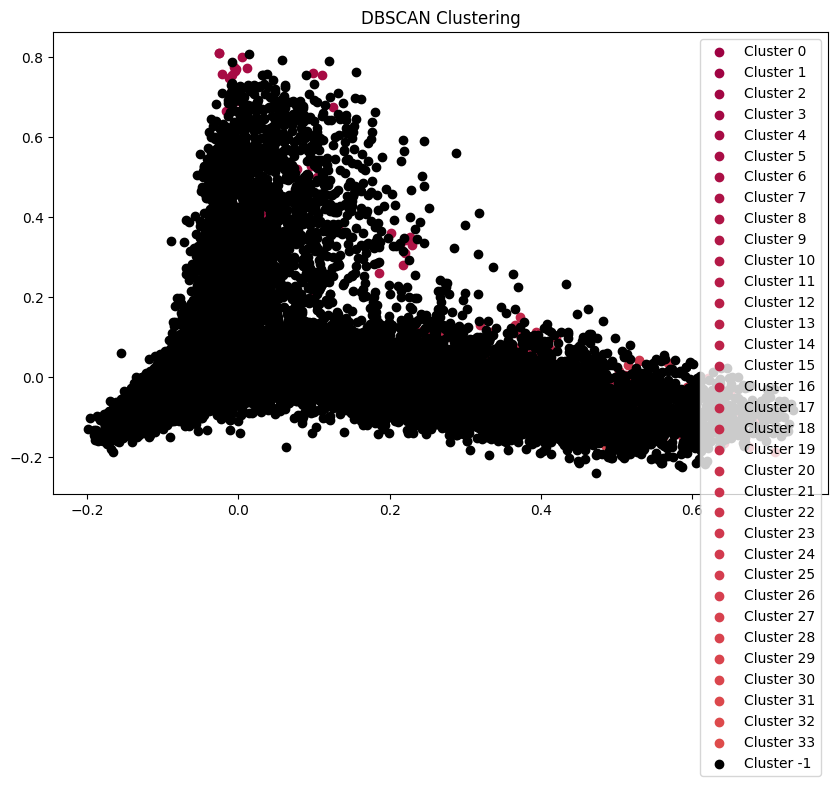

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters
plt.figure(figsize=(10, 6))
unique_labels = set(dbscan_labels)
colors = [plt.cm.Spectral(each) for each in unique_labels]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise points
        col = [0, 0, 0, 1]
    plt.scatter(X_pca[dbscan_labels == k, 0], X_pca[dbscan_labels == k, 1], c=[col], label=f'Cluster {k}')
plt.title("DBSCAN Clustering")
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

# Check if there are more than one cluster
if len(set(dbscan_labels)) > 1:
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, dbscan_labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("Silhouette score cannot be computed. DBSCAN formed only one cluster or all points are noise.")


Silhouette Score: -0.0381
